In [11]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
car = pd.read_csv("car_speed_36912.csv")
car.head(2)

,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,...,NO2,PM10,PM2.5,cctv,kids,speed_limit,entrance,signal,special,vacation
0,20180313,화,4.19로,1080012200,아카데미하우스,국립4.19묘지,상행,1179,1.0,보조간선도로,...,0.072,108.0,69.0,0.0,0.0,40.0,25.0,8.0,0,0
1,20180313,화,4.19로,1080012200,아카데미하우스,국립4.19묘지,상행,1179,1.0,보조간선도로,...,0.070,111.0,66.0,0.0,0.0,40.0,25.0,8.0,0,0


In [2]:
car.columns

Index(['date', 'days', 'road_name', 'link_id', 'start_point', 'end_point',
       'direction', 'road_length', 'road_num', 'road_type', 'urban_suburb',
       'district', 'time', 'value', 'temperature', 'wind', 'rain', 'snow',
       'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM2.5', 'cctv', 'kids',
       'speed_limit', 'entrance', 'signal', 'special', 'vacation'],
      dtype='object')

In [13]:
car['month'] = car['date'].apply(lambda x: int(str(x)[4:6]))

<Figure size 1008x432 with 0 Axes>

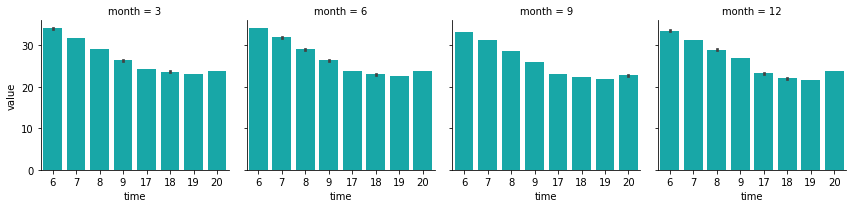

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
g = sns.FacetGrid(car, col="month",col_wrap=4, height=3,)
g.map(sns.barplot, "time", "value", color="c")

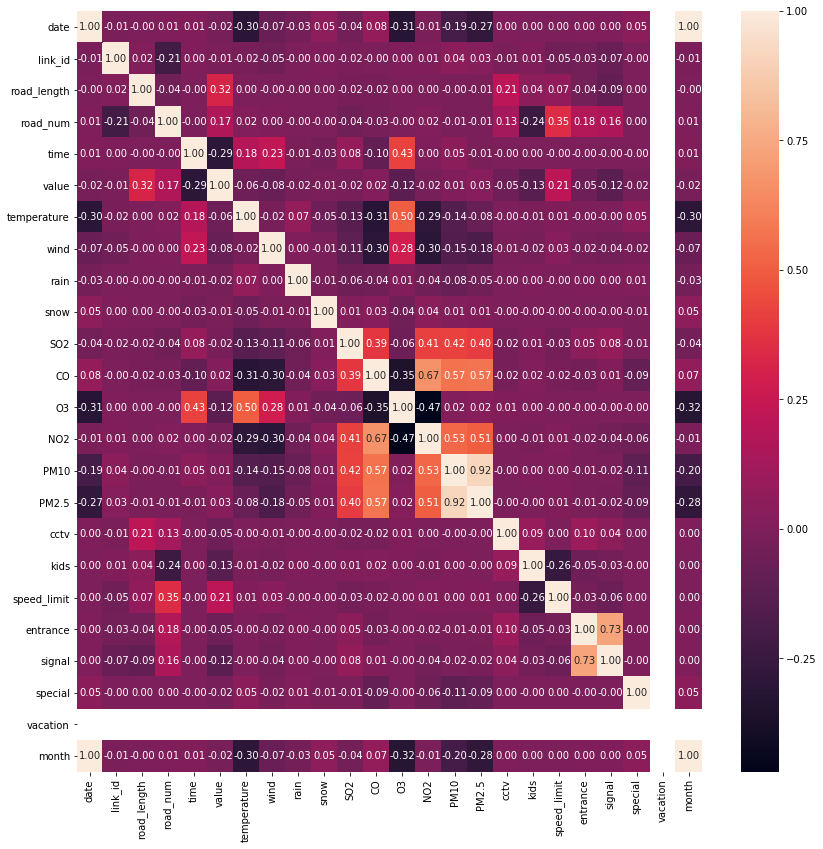

In [16]:
corr = car.corr() 
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt=".2f")

In [19]:
weather = pd.read_csv("weather_merged.csv")
weather.columns

Index(['지점', '일시', 'temperature', 'wind', 'rain', '일자', 'district', 'id',
       'time', 'snow'],
      dtype='object')

In [28]:
weather['month'] = weather['일자'].apply(lambda x: int(x[5:7]))

In [62]:
weather = weather[(weather['month']==3) | (weather['month']==6) | (weather['month']==9) | (weather['month']==12)]
weather.sort_values('snow', ascending=False).head(5)

,지점,일시,temperature,wind,rain,일자,district,id,time,snow,month
212905,419,2018-12-13 11:00:00,-2.8,0.7,0.0,2018-12-13,종로구,419,11,1.7,12
77738,406,2018-12-13 11:00:00,-2.0,0.6,0.5,2018-12-13,도봉구,406,11,1.7,12
112486,409,2018-12-13 11:00:00,-1.1,0.8,0.0,2018-12-13,중랑구,409,11,1.7,12
43021,403,2018-12-13 11:00:00,-0.9,1.4,0.0,2018-12-13,송파구,403,11,1.7,12
54569,404,2018-12-13 11:00:00,-0.5,1.2,0.5,2018-12-13,강서구,404,11,1.7,12


In [51]:
olympic = car[(car['month']==6) & (car['link_id']==1230037000)][['date','days','rain','time','value']]
olympic.sort_values('rain', ascending=False).head(5)

,date,days,rain,time,value
1976783,20180626,화,6.5,9,54.50
2050327,20180628,목,6.5,18,52.67
1976786,20180626,화,4.5,19,53.79
1976784,20180626,화,4.0,17,55.56
2050328,20180628,목,3.5,19,53.36


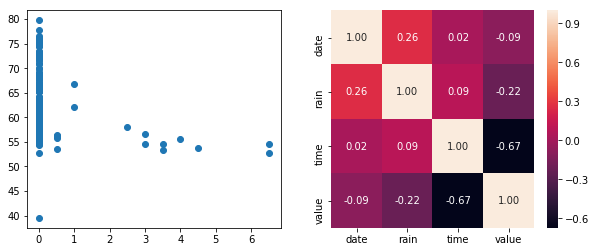

In [57]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(olympic['rain'], olympic['value'])
plt.subplot(1,2,2)
sns.heatmap(olympic.corr(), annot=True, fmt=".2f")
plt.show()

In [67]:
olympic = car[(car['month']==12) & (car['link_id']==1230037000)][['date','days','snow','time','value']]
olympic.sort_values('snow', ascending=False).head(5)

,date,days,snow,time,value
3116661,20181213,목,0.5,9,50.30
3116660,20181213,목,0.1,8,55.90
3783491,20181222,토,0.0,7,62.21
3709386,20181220,목,0.0,18,58.43
3709387,20181220,목,0.0,19,59.71


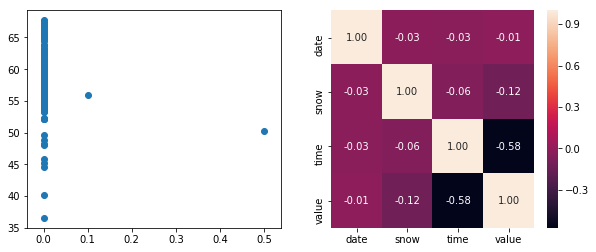

In [68]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(olympic['snow'], olympic['value'])
plt.subplot(1,2,2)
sns.heatmap(olympic.corr(), annot=True, fmt=".2f")
plt.show()